## Covid Data Trends and Statistics
#### By: Jacob Siegel

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Import sklearn features
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import RidgeCV, Ridge, Lasso
from sklearn.preprocessing import MinMaxScaler

#Import Statsmodel features
import statsmodels.api as sm

#Stop Warmings
import warnings
warnings.filterwarnings("ignore")

Mels Ideas: Hospitalizations

## 1.0 Data Overview

The data set comes from a variety of sources, the columns and source are as follows:
* State: Name of state
* Population: Population of state 
* Political Party: Governor of State during 2020 https://en.wikipedia.org/wiki/List_of_current_United_States_governors
* Cases: Total cases recorded for state
* Deaths: Total deaths recorded for state
* Tests: Total tests recorded for state
* Vaccine: Total vaccines recorded for state
* Cases/Deaths/Tests/Vaccines source: https://www.worldometers.info/coronavirus/country/us/
* Unemployment: Average unemployment rate for state
* GDP: Average GDP per capita per state (US$)
* Area: Area of state (miles2)
* White/Black/Hispanic/Asia: Percentage of each race in the State
* Highshool/College: Percentage of state with a high school or college degree
* Obesity: percentage of state considered Obese
* Life Expectancy: Average life expectancy of the state. 

In [3]:
#Load data set
States = pd.read_csv("States.csv")
States.head(20)

,State,Population,Political_Party,2016_Election,Cases,Deaths,Tests,Vaccine,Unemployment,GDP,Area,White,Black,Hispanic,Asian,High_School,College,Obesity,Life_Expectancy
0,Alabama,4903185,Republican,Republican,607209,11624,2906242,3699583,3.3,37261,52420.07,0.654,0.265,0.044,0.014,0.86,0.26,36.1,75.5
1,Alaska,731545,Republican,Republican,74244,390,2539899,704155,6.6,63971,665384.04,0.600,0.022,0.070,0.060,0.93,0.30,30.5,79.0
2,Arizona,7278717,Republican,Republican,946054,18388,5348069,7209235,6.8,38590,113990.30,0.542,0.043,0.318,0.033,0.87,0.30,31.4,80.0
3,Arkansas,3017825,Republican,Republican,404277,6301,4182955,2546791,4.4,36368,53178.55,0.721,0.152,0.078,0.016,0.87,0.23,37.4,76.0
4,California,39512223,Democratic,Democrat,4046728,64786,75404964,45890960,7.7,58619,163694.74,0.364,0.053,0.395,0.147,0.83,0.34,26.2,81.7
5,Colorado,5758736,Democratic,Democrat,581692,7255,3308035,6555288,6.2,52795,104093.67,0.678,0.038,0.218,0.032,0.92,0.41,23.8,80.6
6,Connecticut,3565287,Democratic,Democrat,358076,8296,10043043,4644569,7.9,64511,5543.41,0.657,0.100,0.169,0.046,0.91,0.39,29.1,80.9
7,Delaware,973764,Democratic,Democrat,112772,1835,759402,1104715,5.8,63664,2488.72,0.614,0.218,0.097,0.039,0.90,0.32,34.4,78.5
8,Florida,21477737,Republican,Republican,2770817,39695,33718946,23116303,5.0,39543,65757.70,0.530,0.150,0.266,0.027,0.88,0.30,27.0,80.2
9,Georgia,10617423,Republican,Republican,1211439,21802,12674681,9081621,4.0,44723,59425.15,0.520,0.313,0.098,0.041,0.87,0.31,33.1,77.9


In [3]:
States.describe()

,Population,Cases,Deaths,Tests,Vaccine,Unemployment,GDP,Area,White,Black,Hispanic,Asian,High_School,College,Obesity,Life_Expectancy
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.000000
mean,6.551896e+06,7.128520e+05,12285.900000,1.070261e+07,6.884604e+06,5.170000,48399.120000,75933.477600,0.683000,0.102440,0.12214,0.043180,0.896000,0.31280,32.104000,78.754000
std,7.389343e+06,8.118841e+05,14422.887841,1.440966e+07,8.229252e+06,1.571851,8764.944629,97327.423173,0.159398,0.094608,0.10564,0.057788,0.027255,0.05214,3.867708,1.797301
min,5.787590e+05,2.532000e+04,260.000000,4.562460e+05,4.521450e+05,2.500000,31881.000000,1544.890000,0.204000,0.006000,0.01400,0.006000,0.830000,0.21000,23.800000,74.800000
25%,1.827712e+06,2.065165e+05,2556.250000,2.878416e+06,1.790883e+06,4.000000,43279.500000,37416.612500,0.591000,0.026000,0.05225,0.016250,0.872500,0.28000,29.275000,77.925000
50%,4.558234e+06,4.926640e+05,7576.000000,5.585868e+06,4.388322e+06,4.950000,47416.500000,57093.180000,0.705000,0.069500,0.09700,0.027500,0.900000,0.30500,32.100000,79.100000
75%,7.530849e+06,8.809140e+05,13974.500000,1.143590e+07,9.104884e+06,6.425000,53772.250000,84564.897500,0.793250,0.139000,0.14150,0.048500,0.920000,0.34000,34.800000,79.875000
max,3.951222e+07,4.046728e+06,64786.000000,7.540496e+07,4.589096e+07,7.900000,65545.000000,665384.040000,0.932000,0.376000,0.49500,0.394000,0.940000,0.44000,40.800000,82.300000


In [4]:
Case_Ave = States.Cases.sum() / States.Population.sum()   #Percentage of Cases for all US population
Death_Ave = States.Deaths.sum() / States.Population.sum() #Percentage of Deaths for all US Popilatiion
MorRate = States.Deaths.sum() / States.Cases.sum()        #mortality rate in the US
print('Percentage of cases for all US population:', round(Case_Ave*100, 2),'%')
print('The US mortality rate is:', round(MorRate*100, 2), '%')
print('Total deaths in the US is:', States.Deaths.sum())

Percentage of cases for all US population: 10.88 %
The US mortality rate is: 1.72 %
Total deaths in the US is: 614295


Add additional columns of percentile:

### 1.1 Feature Engineering

In [9]:
#Marker for state above or below national case average (to be used for logistics regression): 
States['Case_Compare'] = (States.Cases / States.Population > Case_Ave)*1 

#Marker for state above or below national death average (to be used for logistics regression):
States['Death_Compare'] = (States.Deaths / States.Population > Death_Ave)*1

#Positivity Rate of the tests (Toral Cases / Total Tests):
States['Percent_Tests'] = (States.Cases / States.Tests) *100

#Percentage of the state vacinated:
States['Percent_Vaccine'] = (States.Vaccine / States.Population) * 100

#Percentage of the state that has died (Total Deaths / Total Polulation):
States['Percent_Death'] = (States.Deaths / States.Population) * 100

#Population Density of the state (Polpulation / Area):
States['Pop_Density'] = (States.Population / States.Area) 

States['Political_Party_N'] = States.Political_Party.apply(lambda x: '0' if x == 'Republican' else 1)
States['Political_Party_N'] = States['Political_Party_N'].astype('int64')

States['2016_Election_N'] = States.Political_Party.apply(lambda x: '0' if x == 'Republican' else 1)
States['2016_Election_N'] = States['2016_Election_N'].astype('int64')

Average death rate for all US population: 0.19 %
Minimum death rate from a state: 0.038
Maximum death rate from a state: 0.3
Standard deviation of death rate from all states: 0.063


<AxesSubplot:xlabel='Percent_Death'>

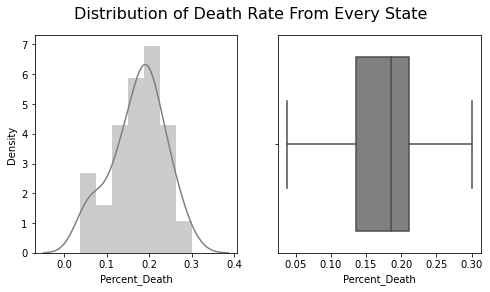

In [10]:
print('Average death rate for all US population:', round(Death_Ave*100, 2),'%')
print('Minimum death rate from a state:', round(States['Percent_Death'].min(),3))
print('Maximum death rate from a state:', round(States['Percent_Death'].max(),3))
print('Standard deviation of death rate from all states:', round(States['Percent_Death'].std(),3))

plt.figure(figsize=(8,4))
plt.suptitle('Distribution of Death Rate From Every State', fontsize=16)
plt.subplot(1,2,1)
sns.distplot(States['Percent_Death'], color="grey")
plt.subplot(1,2,2)
sns.boxplot(x='Percent_Death',data=States, color="grey")

### Project Objective: 
As can be seen from the graph above, there is a wide rage in death rate between the states, ranging from 0.038 % to 0.3%, nearly an order or magnitude difference. Mainstream news and social media have fuel an inherent believe that one political party (either one depending on the news source) is better than the other at managing the Covid virus. The goal of this data exploration is to exam the potential causes of the wide range in distribution of deaths per state and determine the statistically more significant indicators of high or low Covid deaths.  

## 2.0 EDA With Focus on Political Party

In [50]:
#two sub groups of data for Democrat and Republican
States_D = States[States['Political_Party'] != 'Republican']
States_R = States[States['Political_Party'] != 'Democratic']

States_D2016 = States[States['2016_Election'] != 'Republican']
States_R2016 = States[States['2016_Election'] != 'Democrat']

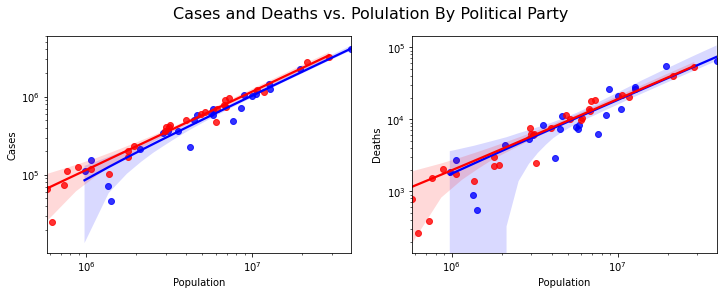

In [11]:
plt.figure(figsize=(12,4))
plt.suptitle('Cases and Deaths vs. Polulation By Political Party', fontsize=16)

j=1
for i in ['Cases', 'Deaths']:
    plt.subplot(1,2,j)
    sns.regplot(x="Population", y=i, data = States[States['Political_Party'] != 'Republican'], color="b")
    sns.regplot(x="Population", y=i, data = States[States['Political_Party'] != 'Democratic'], color="r")
    plt.yscale("log")
    plt.xscale("log")
    j=j+1

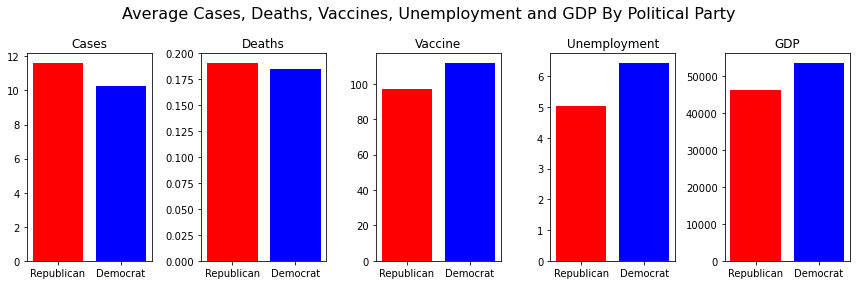

In [12]:
plt.figure(figsize=(12,4))
plt.suptitle('Average Cases, Deaths, Vaccines, Unemployment and GDP By Political Party', fontsize=16)
j=1
for i in ['Cases', 'Deaths', 'Vaccine']:
    plt.subplot(1,5,j)
    x = ['Republican', 'Democrat']
    y = np.array([(States[States['Political_Party'] != 'Democratic'][i].sum() / 
                   States[States['Political_Party'] != 'Democratic'].Population.sum()) * 100, 
                  (States[States['Political_Party'] != 'Republican'][i].sum() / 
                   States[States['Political_Party'] != 'Republican'].Population.sum()) * 100])
    plt.bar(x, y, color=['red', 'blue'])
    plt.tight_layout()
    plt.title(i)
    j=j+1

#------------------------------------------------------------------------------

for i in ['Unemployment', 'GDP']:
    x = ['Republican', 'Democrat']
    y = np.array([(np.array([States[States['Political_Party'] != 'Democratic'].Population * 
                             States[States['Political_Party'] != 'Democratic'][i]]).sum()) / 
                  States[States['Political_Party'] != 'Democratic'].Population.sum(),
                  (np.array([States[States['Political_Party'] != 'Republican'].Population * 
                             States[States['Political_Party'] != 'Republican'][i]]).sum()) / 
                  States[States['Political_Party'] != 'Republican'].Population.sum()])
    plt.subplot(1,5,j)
    plt.bar(x, y, color=['red', 'blue'])
    plt.tight_layout()
    plt.title(i)
    j=j+1

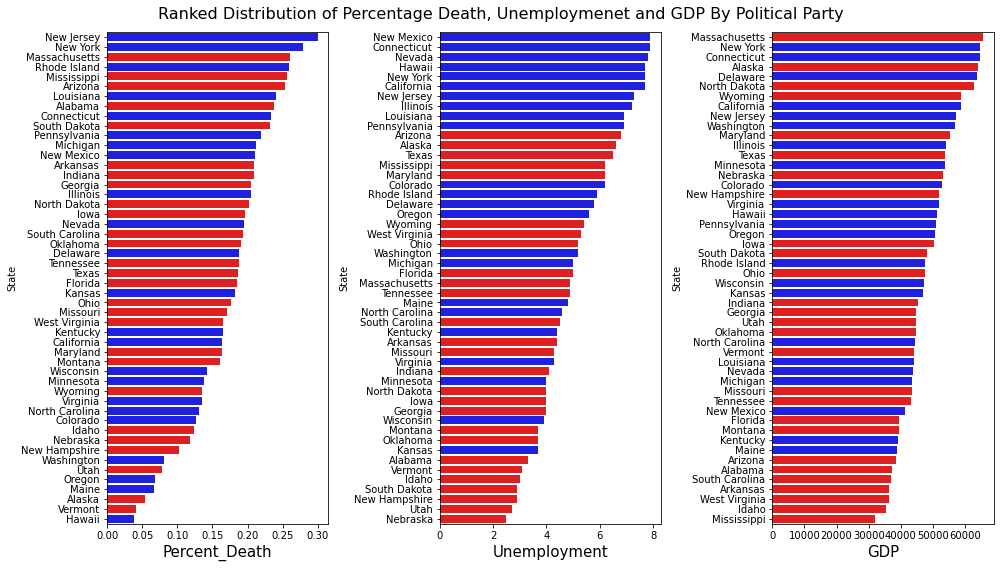

In [13]:
plt.figure(figsize = (14,8)) # To resize the plot
plt.suptitle('Ranked Distribution of Percentage Death, Unemploymenet and GDP By Political Party', fontsize=16)
j=1
for i in ['Percent_Death', 'Unemployment', 'GDP']:
    plt.subplot(1,3,j)
    States['temp'] = States.Political_Party_N * States[i]
    sns.barplot(x=i, y="State", data=States.sort_values(i, ascending=False), color="r")
    sns.barplot(x="temp", y="State", data=States.sort_values(i, ascending=False), color="b") 
    plt.xlabel(i, fontsize=15)
    plt.tight_layout()
    j=j+1

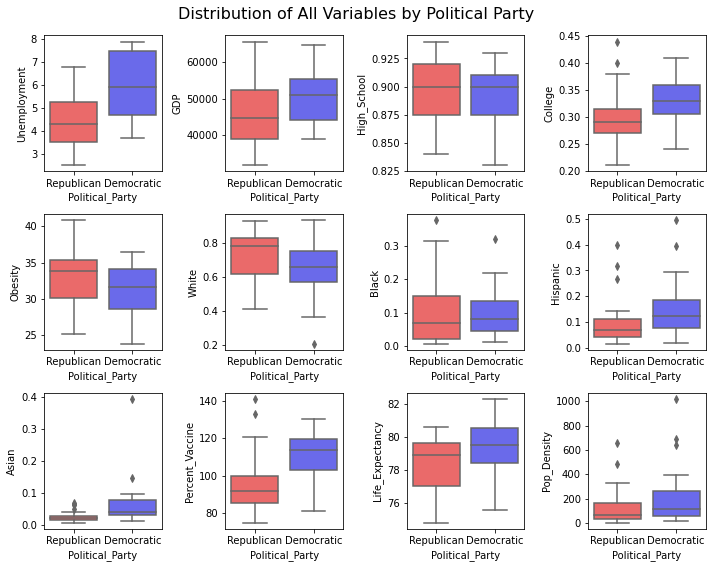

In [16]:
plt.figure(figsize=(10,8))
plt.suptitle('Distribution of All Variables by Political Party', fontsize=16)
j=1
for i in ['Unemployment', 'GDP', 'High_School', 'College', 'Obesity', 'White', 'Black', 'Hispanic', 'Asian',
            'Percent_Vaccine', 'Life_Expectancy', 'Pop_Density']:
    plt.subplot(3,4,j)
    sns.boxplot(y=i, x='Political_Party', data=States, palette="seismic_r")
    plt.tight_layout()
    j=j+1

## 3.0 Multi Variate EDA 

In [48]:
States_Sub = States[['Percent_Death','Unemployment', 'GDP', 'High_School', 'College', 'Obesity', 
                     'White', 'Black', 'Hispanic', 'Asian', 'Percent_Vaccine', 'Life_Expectancy',
                     'Political_Party_N', 'Pop_Density', '2016_Election_N']]

States_Cor = pd.DataFrame(States_Sub.corr().Percent_Death.abs().sort_values(ascending=False).reset_index().drop(0,axis=0))
States_Cor.columns = ['Category', 'Correlation']
print('table of correlation values with percentage of death')
States_Cor

table of correlation values with percentage of death


,Category,Correlation
1,High_School,0.489298
2,Pop_Density,0.480644
3,Black,0.445699
4,Unemployment,0.287978
5,Obesity,0.280067
6,Life_Expectancy,0.247336
7,Asian,0.231044
8,Hispanic,0.202647
9,White,0.197065
10,Percent_Vaccine,0.170903


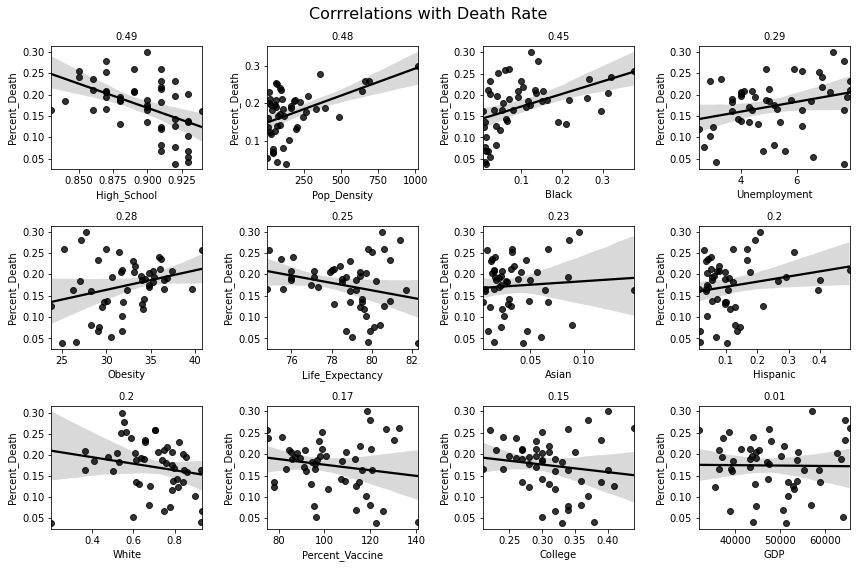

In [113]:
plt.figure(figsize=(12,8))
plt.suptitle('Corrrelations with Death Rate', fontsize=16)

j=1
for i in States_Cor.Category[0:12]:
    plt.subplot(3,4,j)
    plt.title(round(States_Cor.Correlation[j], 2), fontsize=10)
    sns.regplot(x=i, y='Percent_Death', data=States, color="black")
    plt.tight_layout()
    j=j+1

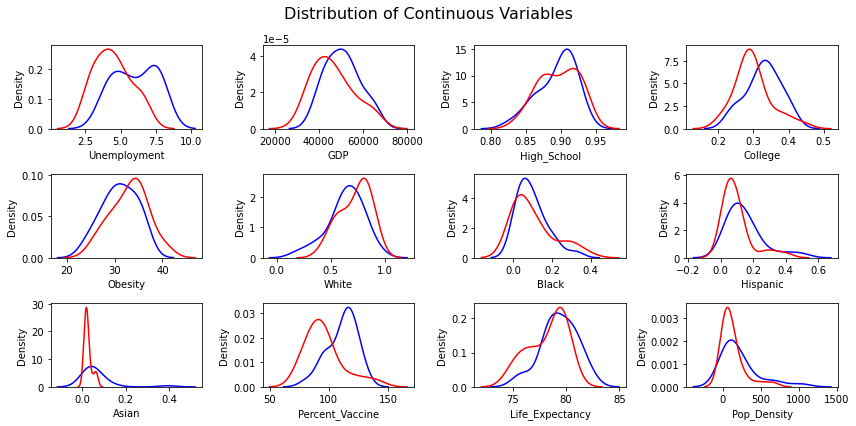

In [53]:
plt.figure(figsize=(126))
plt.suptitle('Distribution of Continuous Variables', fontsize=16)

j=1
for i in ['Unemployment', 'GDP', 'High_School', 'College', 'Obesity', 'White', 'Black', 'Hispanic', 'Asian', 'Percent_Vaccine', 'Life_Expectancy', 'Pop_Density']:
    plt.subplot(3,4,j)
    sns.distplot(States[States['Political_Party'] != 'Republican'][i], hist=False, color="b")
    sns.distplot(States[States['Political_Party'] != 'Democratic'][i], hist=False, color="r")
    plt.tight_layout()
    j=j+1

There is an outlier in the Asian column 

In [54]:
States[States['Asian'] > .3]

,State,Population,Political_Party,2016_Election,Cases,Deaths,Tests,Vaccine,Unemployment,GDP,...,Life_Expectancy,Case_Compare,Death_Compare,Percent_Tests,Percent_Vaccine,Percent_Death,Pop_Density,Political_Party_N,2016_Election_N,temp
10,Hawaii,1415872,Democratic,Democrat,46503,542,1908582,1731970,7.7,51277,...,82.3,0,0,2.436521,122.325323,0.03828,129.5196,1,1,51277


Remove Hawaii as an outlier for asian population

In [55]:
States.loc[States['Asian'] > .3, 'Asian'] = States.Asian.mean()

<AxesSubplot:xlabel='Asian', ylabel='Percent_Death'>

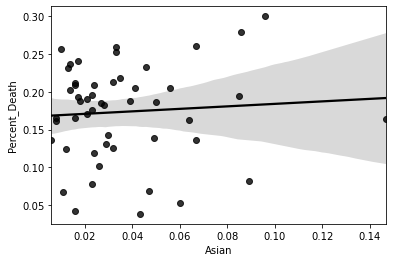

In [68]:
sns.regplot(x='Asian', y='Percent_Death', data=States, color="black")

## 4.0 Modeling

### 4.1 Linear Regression

In [122]:
#Create dependent(y) and independent (x) variables. X is then scaled per column. 

X = States[['Unemployment', 'GDP', 'High_School', 'College', 'Obesity', 'Black', 'Hispanic', 'Asian',
            'Percent_Vaccine', 'Life_Expectancy', 'Political_Party_N', 'Pop_Density', '2016_Election_N']]
Y = States[['Percent_Death']]

X.iloc[:,:] = MinMaxScaler().fit_transform(X)

In [123]:
TEMP = pd.DataFrame()
for i in range(1,1001):
    model_N = "Model%d"%i
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
    model = RidgeCV(alphas=.3,  normalize=True)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    temp = pd.DataFrame([[model_N, r2_score(y_test, pred), model.intercept_[0]]],
                        columns=['model', 'R_Score', 'intercept'])
    temp2 = pd.DataFrame(model.coef_, columns = X_train.columns)
    
    TEMP = TEMP.append(temp.join(temp2))
    
best_model = TEMP.sort_values('R_Score', ascending=False).head(1) 
best_model_score = best_model.R_Score
best_model_int = best_model.intercept
best_model = best_model.drop({'model', 'R_Score', 'intercept'}, axis=1).T
best_model_values = best_model.reset_index()
best_model_values.columns = ['Category', 'Coef']
best_model_values = best_model_values.sort_values('Coef', ascending=False)
print('R2 score for the best model is:', best_model_score)

R2 score for the best model is: 0    0.832426
Name: R_Score, dtype: float64


<AxesSubplot:xlabel='Coef', ylabel='Category'>

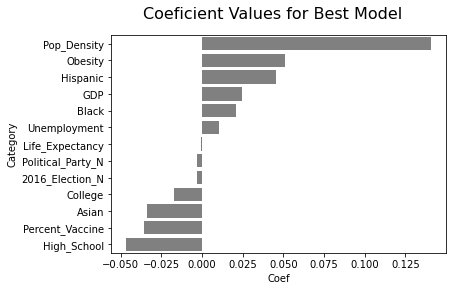

In [124]:
#Plot of the caeficient values for linear regression
plt.suptitle('Coeficient Values for Best Model', fontsize=16)
sns.barplot(x="Coef", y="Category", data=best_model_values, color="grey")

<Figure size 432x288 with 0 Axes>

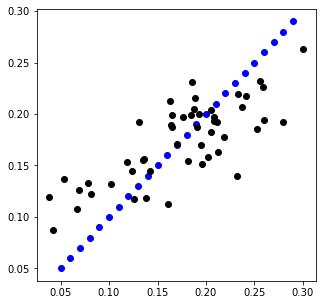

In [127]:
best_model_predict = (X * (best_model.T.append([best_model.T]*49,ignore_index=True))).sum(axis = 1) + ((np.ones(50))*best_model_int[0])
plt.suptitle('Predicted vs Actual Death Rate', fontsize=16)
temp = pd.DataFrame(range(50,300,10))*.001
plt.figure(figsize=(5,5))
plt.scatter(temp, temp, color="blue")
plt.scatter(Y, best_model_predict, color="black")

### 4.2 Logistics Regression

In [116]:
X = States[['Unemployment', 'GDP', 'High_School', 'College', 'Obesity', 'Black', 'Hispanic', 'Asian',
            'Percent_Vaccine', 'Life_Expectancy', 'Political_Party_N', 'Pop_Density', '2016_Election_N']]
Y = States[['Death_Compare']]

In [117]:
Y.value_counts()

Death_Compare
0                26
1                24
dtype: int64

A fairly even split of states that are above (1) and below (0) the national average

In [118]:
TEMP = pd.DataFrame()
for i in range(1,501):
    model = "Model%d"%i
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
    rf_estimator = RandomForestClassifier(random_state=1)
    rf_estimator.fit(X_train,y_train)
    temp = pd.DataFrame(rf_estimator.feature_importances_, columns = [model], index = X_train.columns)
    TEMP[model] = temp[model]
    
TEMP = TEMP.sum(axis=1)/i
TEMP = TEMP.sort_values(ascending = False)
TEMP = TEMP.to_frame()
TEMP = TEMP.reset_index()
TEMP.columns = ['Category', 'Average_Importance']

<AxesSubplot:xlabel='Average_Importance', ylabel='Category'>

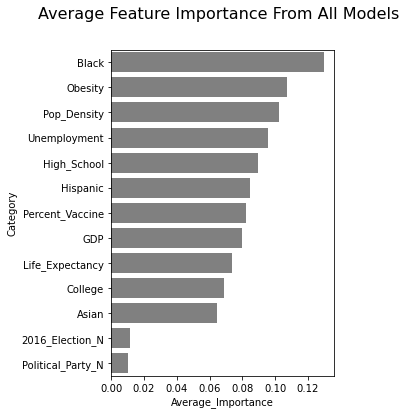

In [120]:
plt.figure(figsize=(4,6))
plt.suptitle('Average Feature Importance From All Models', fontsize=16)
sns.barplot(x="Average_Importance", y="Category", data=TEMP, color="grey")

In [ ]:
PCA ANalysis

In [ ]:
Cross Validation

In [86]:
%%timeit
States.groupby("Political_Party")[["Population", "Cases"]].sum()

1.03 ms ± 13.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
